Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Unnamed: 0   觀測時間(day) 測站氣壓(hPa) 海平面氣壓(hPa) 測站最高氣壓(hPa)     測站最高氣壓時間(LST)  \
0           0  2022-01-01    1021.7        ...      1023.8  2022-01-01 00:11   
1           1  2022-01-02    1020.1        ...      1022.1  2022-01-02 08:53   
2           2  2022-01-03    1018.8        ...      1020.7  2022-01-03 09:36   
3           3  2022-01-04    1017.8        ...      1020.2  2022-01-04 08:31   
4           4  2022-01-05    1015.6        ...      1017.5  2022-01-05 00:01   

  測站最低氣壓(hPa)     測站最低氣壓時間(LST) 氣溫(℃) 最高氣溫(℃)  ... 日照率(%) 全天空日射量(MJ/㎡)  \
0      1019.1  2022-01-01 15:14  18.2    24.8  ...    ...          ...   
1      1017.5  2022-01-02 14:51  18.0    25.7  ...    ...          ...   
2      1016.2  2022-01-03 14:51  18.4    25.8  ...    ...          ...   
3      1015.2  2022-01-04 15:30  18.9    27.0  ...    ...          ...   
4      1013.1  2022-

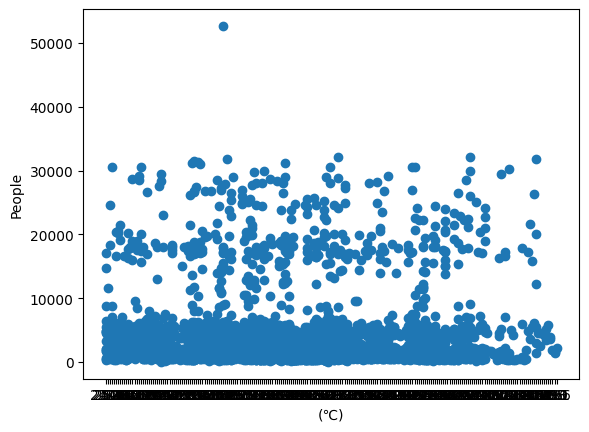

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[1 1 1 ... 1 1 1]
       最高氣溫(℃)    總進車站人數
0    -0.974411 -0.256433
1    -0.773681 -0.170175
2    -0.751378 -0.013726
3    -0.483737 -0.098124
4    -1.019018 -0.085608
...        ...       ...
3280 -1.041321 -0.467682
3281 -0.974411 -0.449246
3282 -1.777332 -0.359605
3283 -1.554299 -0.121464
3284 -0.996715 -0.293474

[3285 rows x 2 columns]
4671.753413071951
準確率: 0.334855403348554
分類預測結果0，人數小於25%


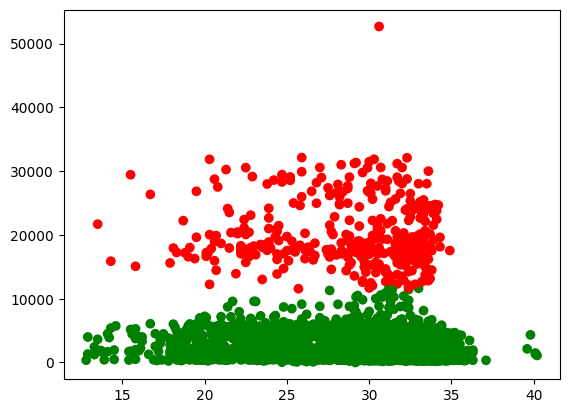

In [69]:
from google.colab import drive
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
from IPython.utils import encoding
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier


drive.mount("/content/drive")

df = pd.read_csv("/content/drive/MyDrive/機器學習/期末作業/整合台南車測站資料集.csv")




#探索性分析

# 檢視資料前5筆
print(df.head())
print(df.info())
# 檢視資料統計資訊
print(df.describe())
# 查看有無重複值
print(df.duplicated())
#資料探索-散佈圖
plt.scatter(df['最高氣溫(℃)'], df['總進車站人數'])
plt.xlabel('(℃)')
plt.ylabel('People')
plt.show()


df.replace('...', np.nan, inplace=True)
imputer = SimpleImputer(strategy='mean')
df[['最高氣溫(℃)', '總進車站人數']] = imputer.fit_transform(df[['最高氣溫(℃)', '總進車站人數']])

# 將欄位轉換為浮點數
df['最高氣溫(℃)'] = df['最高氣溫(℃)'].astype(float)
df['總進車站人數'] = df['總進車站人數'].astype(float)
df['風速(m/s)'] = df['風速(m/s)'].astype(float)
df['風向(360degree)'] = df['風向(360degree)'].astype(float)
df['最低氣溫(℃)'] = df['最低氣溫(℃)'].astype(float)


#分群
features = ['最高氣溫(℃)','總進車站人數']
X = df[features]
#對特徵矩陣進行標準化。
scaler = StandardScaler()
X = scaler.fit_transform(X)

#建立K-means分群模型，設定要分成的群數。
kmeans = KMeans(n_clusters=2)
y_pred = kmeans.fit_predict(X)

#分群結果
df['cluster'] = y_pred
print(y_pred)
df['pred']=y_pred
c={0:'r',1:'g'}
df['colors']=df['pred'].map(c)
df3=plt.scatter(df['最高氣溫(℃)'],df['總進車站人數'],c=df['colors'])
df5=pd.DataFrame(X,columns=['最高氣溫(℃)', '總進車站人數'])
print(df5)


# 提取需要的特徵和標籤
X = df[['最高氣溫(℃)']]
y = df[['總進車站人數']]

# 建立並訓練線性迴歸模型
lr = LinearRegression()
lr.fit(X, y)
X_30 = [[30]]
y_pred_30 = lr.predict(X_30)

b30 = y_pred_30[0][0]
print(b30)


# 提取特徵和標籤
df=df.drop_duplicates()
df.reset_index(drop=True)
df_X=df[['最高氣溫(℃)']]
df_y=df['總進車站人數']

cList=[]
for i in df_y:
  if i<1699:
    cList.append(0)
  elif i<2720:
    cList.append(1)
  elif i<4751:
    cList.append(2)
  else:
    cList.append(3)
df_y=cList

X_train, X_test, y_train, y_test = train_test_split(df_X,df_y, test_size=0.2)
k=2
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
print('準確率:',knn.score(X_train,y_train))

new=[[10]]
v=knn.predict(new)
if v==0:
  print('分類預測結果{}，人數小於25%'.format(v[0]))
elif v==1:
  print('分類預測結果{}，人數介於25%-50%'.format(v[0]))
elif v==2:
  print('分類預測結果{}，人數介於50%-75%'.format(v[0]))
else:
  print('分類預測結果{}，人數高於75%'.format(v[0]))

In [68]:
df_y.describe()

count     3285.000000
mean      4736.152207
std       5913.362601
min          1.000000
25%       1699.000000
50%       2720.000000
75%       4751.000000
max      52682.000000
Name: 總進車站人數, dtype: float64